In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import numpy as np

# 한글
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
%matplotlib inline

# 1의 중앙값이상 데이터 분석

In [5]:
df = pd.read_csv("./datasets/y/90proba정리.csv")
df_추가 = pd.read_csv("./datasets/y/mk_df.csv")

In [4]:
df

,회사명,거래소코드,회계년도,proba,target_3,정리
0,(주)ES큐브,50120,2019,91.639163,0,TMD
1,(주)ES큐브,50120,2021,96.711402,0,TMD
2,(주)강스템바이오텍,217730,2019,92.253404,0,바이오
3,(주)골드앤에스,35290,2019,99.999970,0,1예측
4,(주)골드앤에스,35290,2020,99.603963,1,1
...,...,...,...,...,...,...
296,크리스탈지노믹스(주),83790,2014,99.991138,0,3년연속적자
297,태산엘시디(주),36210,2013,100.000000,1,1
298,피씨엘(주),241820,2019,100.000000,0,바이오
299,현대바이오사이언스(주),48410,2021,98.749726,0,바이오


In [260]:
df['정리'].value_counts()

1                         93
바이오                       60
상장폐지실질검사                  22
1예측                       21
관리종목                      20
불성실공시법인                   18
3년연속적자                    16
CND                       14
주가조작                      11
TMD                        6
23년상장폐지                    6
거래정지(불성실공시)                4
거래정지(감사의견거절)               3
WW-폐기물(특정기업의 엄청난 성장영향)     3
22년상장폐지                    2
여행사(코로나)                   1
22년회생절차                    1
Name: 정리, dtype: int64

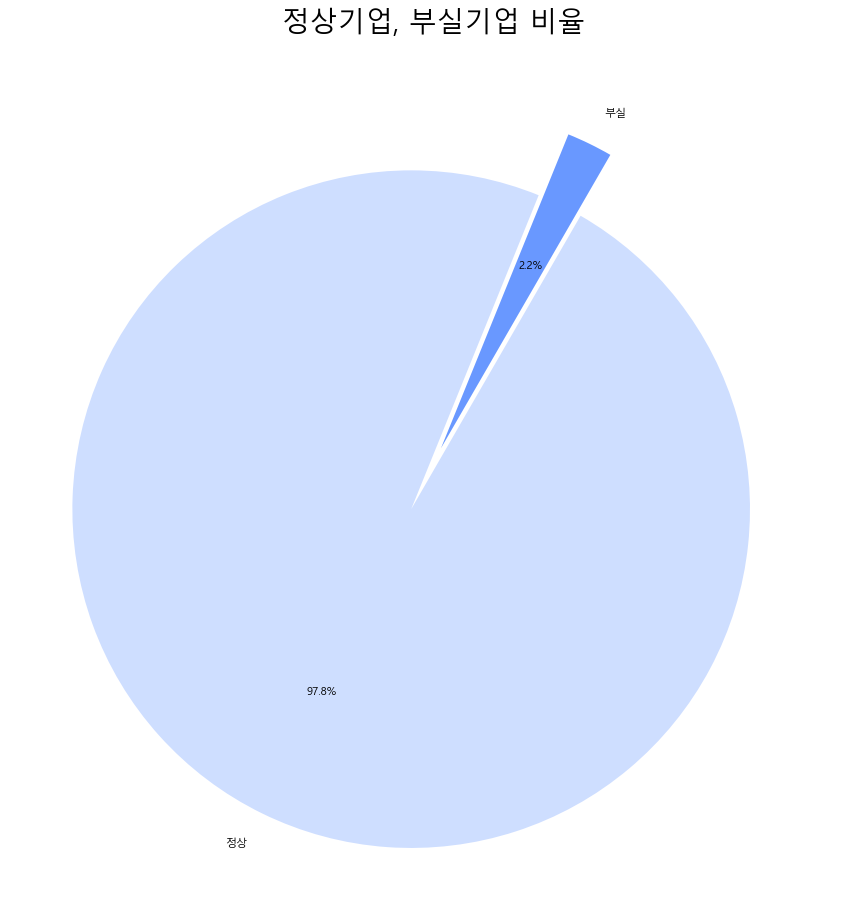

In [261]:
# 정상, 부실기업 
from collections import Counter

data = df_추가[df_추가['회계년도']<=2021].reset_index(drop=True)
data['target_3'] = data['target_3'].replace(1 , '부실')
data['target_3'] = data['target_3'].replace(0 , '정상')
data = data['target_3']

# 폰트 크기 설정
plt.rcParams['font.size'] = 8

# 데이터 개수 세기
count = Counter(data)
labels = list(count.keys())
count = list(count.values())

# 데이터 개수에 따라 정렬하기
sorted_index = sorted(range(len(count)), key=lambda k: count[k], reverse=True)
labels = [labels[i] for i in sorted_index]
count = [count[i] for i in sorted_index]

# 그래프 그리기
colors = ['#cedeff', '#6998ff']
explode = [0.05] * len(labels)
idx = count.index(max(count))
explode[idx] = 0.15

plt.figure(figsize=(11, 11)) 
plt.pie(count, labels=labels, colors=colors, explode=explode, autopct='%.1f%%', startangle=60-idx*90, counterclock=False)
plt.title('정상기업, 부실기업 비율', fontsize=20)
plt.show()

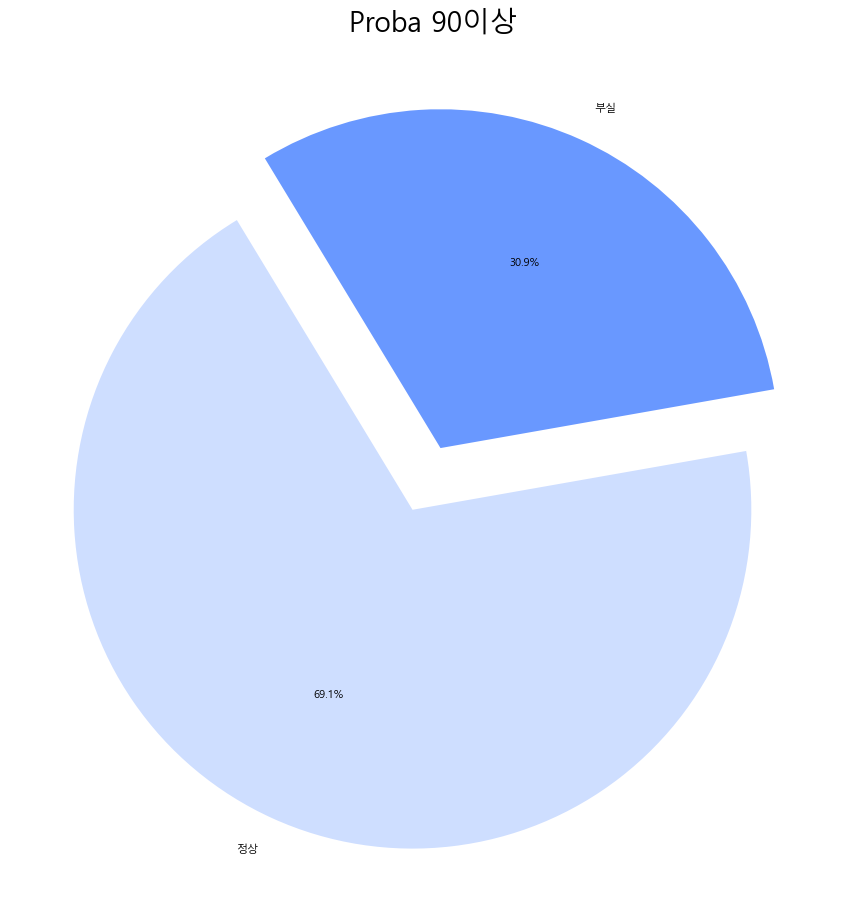

In [262]:
# proba 90이상(1의 중앙값) 
from collections import Counter

df['target_3'] = df['target_3'].replace(1 , '부실')
df['target_3'] = df['target_3'].replace(0 , '정상')
data = df['target_3']


# 폰트 크기 설정
plt.rcParams['font.size'] = 8

# 데이터 개수 세기
count = Counter(data)
labels = list(count.keys())
count = list(count.values())

# 데이터 개수에 따라 정렬하기
sorted_index = sorted(range(len(count)), key=lambda k: count[k], reverse=True)
labels = [labels[i] for i in sorted_index]
count = [count[i] for i in sorted_index]

# 그래프 그리기
colors = ['#cedeff', '#6998ff']
explode = [0.05] * len(labels)
idx = count.index(max(count))
explode[idx] = 0.15

plt.figure(figsize=(11, 11)) 
plt.pie(count, labels=labels, colors=colors, explode=explode, autopct='%.1f%%', startangle=10-idx*90, counterclock=False)
plt.title('Proba 90이상', fontsize=20)
plt.show()

In [263]:
df['정리'].value_counts()

1                         93
바이오                       60
상장폐지실질검사                  22
1예측                       21
관리종목                      20
불성실공시법인                   18
3년연속적자                    16
CND                       14
주가조작                      11
TMD                        6
23년상장폐지                    6
거래정지(불성실공시)                4
거래정지(감사의견거절)               3
WW-폐기물(특정기업의 엄청난 성장영향)     3
22년상장폐지                    2
여행사(코로나)                   1
22년회생절차                    1
Name: 정리, dtype: int64

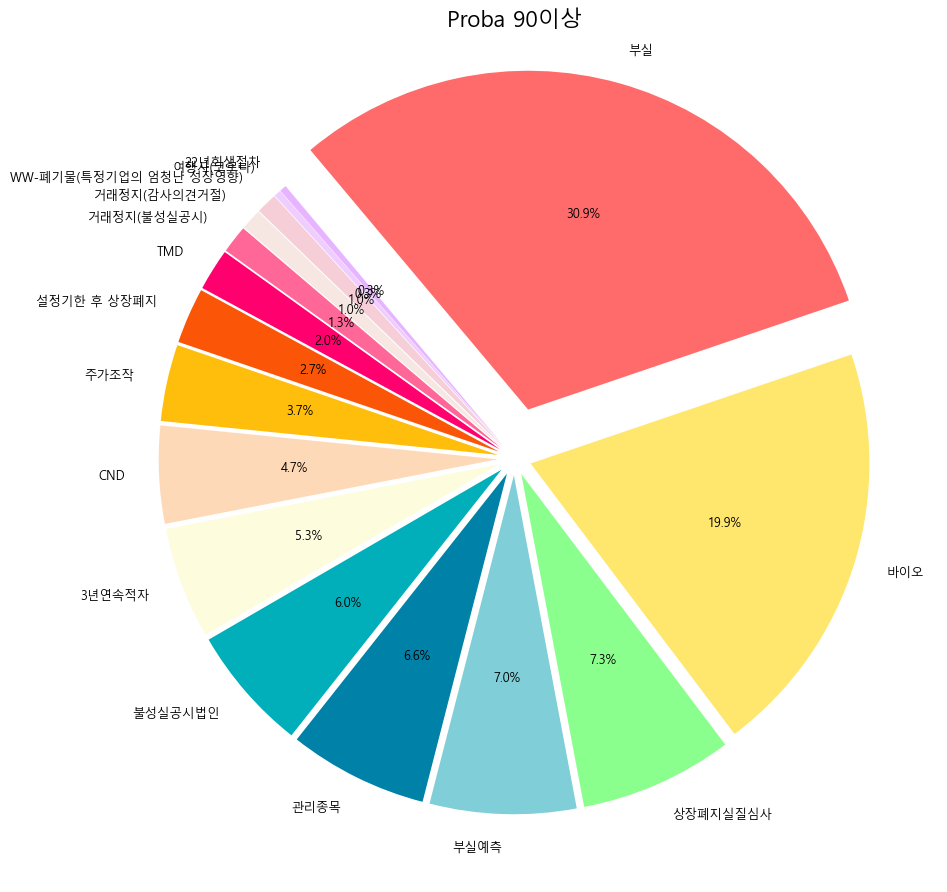

In [264]:
# proba 90이상(1의 중앙값) 
from collections import Counter

df['정리'] = df['정리'].replace('1' , '부실')
df['정리'] = df['정리'].replace('1예측' , '부실예측')
df['정리'] = df['정리'].replace('22년상장폐지' , '설정기한 후 상장폐지')
df['정리'] = df['정리'].replace('23년상장폐지' , '설정기한 후 상장폐지')
df['정리'] = df['정리'].replace('상장폐지실질검사' , '상장폐지실질심사')
data = df['정리']

# 폰트 크기 설정
plt.rcParams['font.size'] = 9

# 데이터 개수 세기
count = Counter(data)
labels = list(count.keys())
count = list(count.values())

# 데이터 개수에 따라 정렬하기
sorted_index = sorted(range(len(count)), key=lambda k: count[k], reverse=True)
labels = [labels[i] for i in sorted_index]
count = [count[i] for i in sorted_index]

# 그래프 그리기
colors = ['#FF6B6B', '#FFE66D', '#8AFF8D', '#80CED7','#0081A7', '#00AFB9', '#FDFCDC', '#FED9B7','#FFBE0B', '#FB5607', '#FF006E','#ff6799','#F7E7E2','#F6CED8','#efceff','#e7b5ff']
explode = [0.05] * len(labels)
idx = count.index(max(count))
explode[idx] = 0.15
# colors=colors
plt.figure(figsize=(11, 11)) 
plt.pie(count, labels=labels, colors = colors, explode=explode, autopct='%.1f%%', startangle=130-idx*90, counterclock=False)
plt.title('Proba 90이상', fontsize=16)
plt.show()

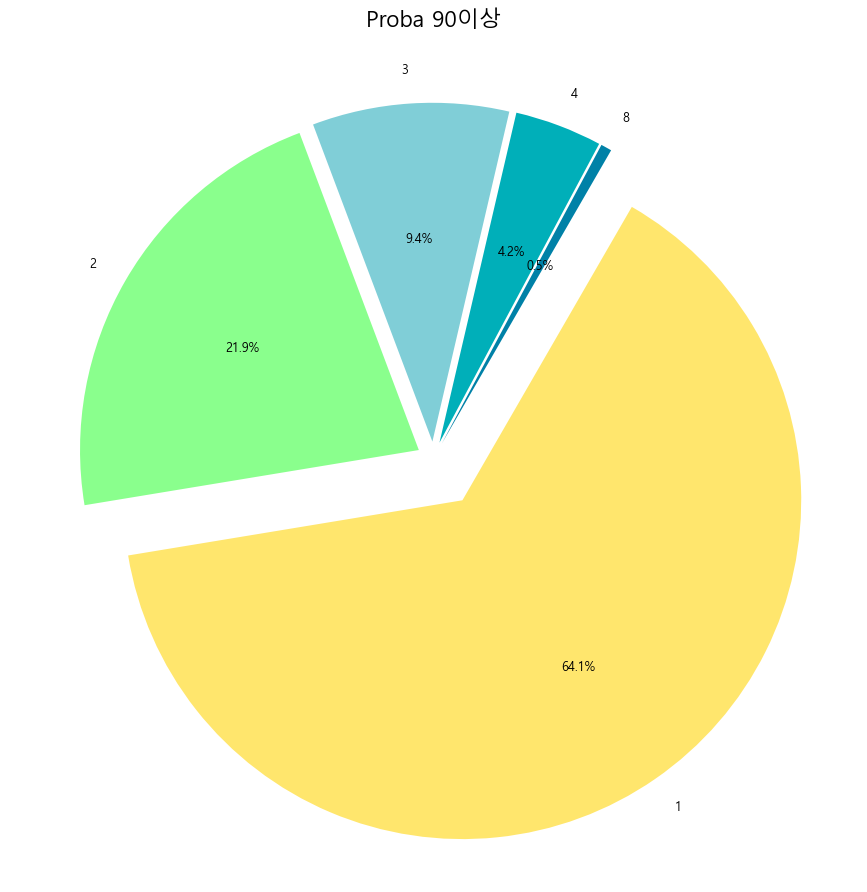

In [265]:
# proba 90이상(1의 중앙값) 
data = df['회사명'].value_counts()

# 폰트 크기 설정
plt.rcParams['font.size'] = 9

# 데이터 개수 세기
count = Counter(data)
labels = list(count.keys())
count = list(count.values())

# 데이터 개수에 따라 정렬하기
sorted_index = sorted(range(len(count)), key=lambda k: count[k], reverse=True)
labels = [labels[i] for i in sorted_index]
count = [count[i] for i in sorted_index]

# 그래프 그리기
colors = ['#FFE66D', '#8AFF8D', '#80CED7','#00AFB9','#0081A7']
explode = [0.05] * len(labels)
idx = count.index(max(count))
explode[idx] = 0.15
# colors=colors
plt.figure(figsize=(11, 11)) 
plt.pie(count, labels=labels, explode=explode, colors=colors, autopct='%.1f%%', startangle=60-idx*90, counterclock=False)
plt.title('Proba 90이상', fontsize=16)
plt.show()

In [266]:
df['회사빈도수'] = df.groupby('회사명')['회사명'].transform('count')
df[df['회사빈도수'] >= 8]

,회사명,거래소코드,회계년도,proba,target_3,정리,회사빈도수
15,(주)다우데이타,32190,2012,99.999785,정상,주가조작,8
16,(주)다우데이타,32190,2013,98.908398,정상,주가조작,8
17,(주)다우데이타,32190,2016,96.088613,정상,주가조작,8
18,(주)다우데이타,32190,2017,99.995207,정상,주가조작,8
19,(주)다우데이타,32190,2018,100.000000,정상,주가조작,8
20,(주)다우데이타,32190,2019,100.000000,정상,주가조작,8
21,(주)다우데이타,32190,2020,100.000000,정상,주가조작,8
22,(주)다우데이타,32190,2021,100.000000,정상,주가조작,8


# 0의 중앙값이하 데이터 분석

In [267]:
# 0의 중앙값이하 데이터 분석
df_0 = pd.read_csv('./datasets/타겟0_프로바_50분위_이하(전체).csv',index_col=0)

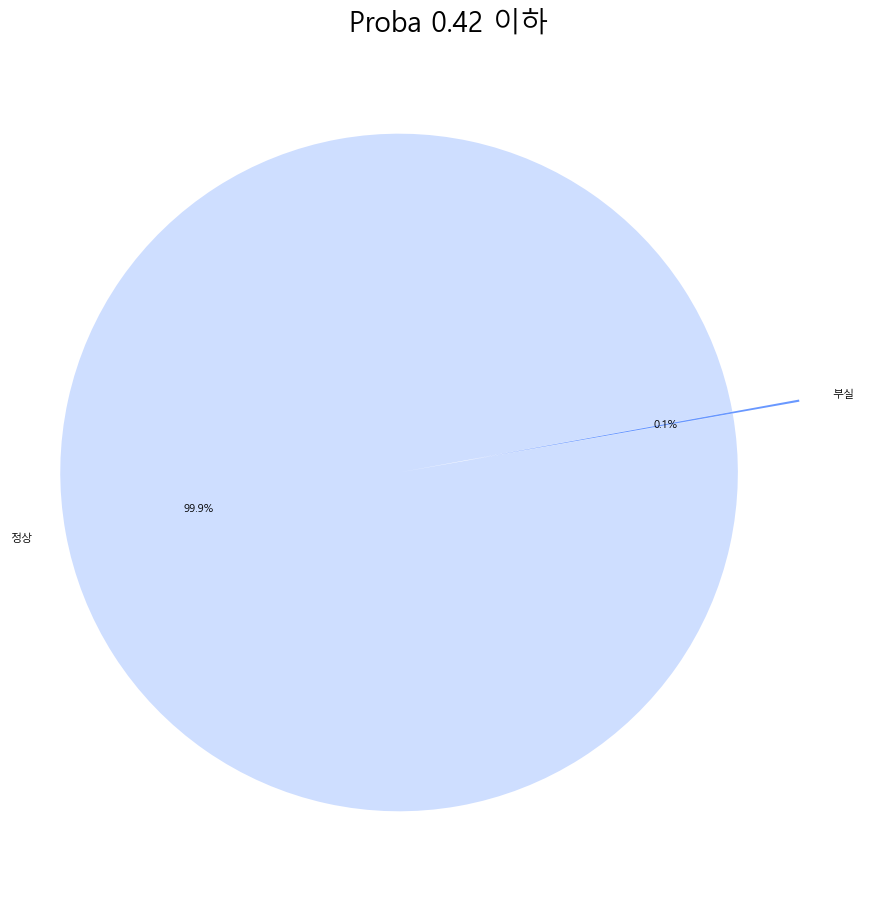

In [268]:
# proba 0.42이하(0의 중앙값) 
from collections import Counter

df_0['target_3'] = df_0['target_3'].replace(1 , '부실')
df_0['target_3'] = df_0['target_3'].replace(0 , '정상')
data = df_0['target_3']


# 폰트 크기 설정
plt.rcParams['font.size'] = 8

# 데이터 개수 세기
count = Counter(data)
labels = list(count.keys())
count = list(count.values())

# 데이터 개수에 따라 정렬하기
sorted_index = sorted(range(len(count)), key=lambda k: count[k], reverse=True)
labels = [labels[i] for i in sorted_index]
count = [count[i] for i in sorted_index]

# 그래프 그리기
colors = ['#cedeff', '#6998ff']
explode = [0.05] * len(labels)
idx = count.index(max(count))
explode[idx] = 0.15

plt.figure(figsize=(11, 11)) 
plt.pie(count, labels=labels, colors=colors, explode=explode, autopct='%.1f%%', startangle=10-idx*90, counterclock=False)
plt.title('Proba 0.42 이하', fontsize=20)
plt.show()

In [269]:
# proba 0.42이하(0의 중앙값) 
df_0['정리'] = df_0['정리'].replace('0' , '정상')
data = df_0[df_0['정리']!='정상']
data["정리"]

393                     블록체인-가상화폐
394                     블록체인-가상화폐
1057                  2014년 임직원횡령
3336    140억원 규모 특허권 패소, 기업사냥군+횡령
3761       중국시장진출(자회사설립), 중국의 한한령
7681                바로 그 다음해 재상장함
Name: 정리, dtype: object